# Exercise 6

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from scipy import stats
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from src.my_random.mcmc import *
p = [1/3, 1/3, 1/3]

dx = [np.flatnonzero(stats.multinomial.rvs(1, p))[0] -1 for _ in range(3)]
dx

[0, 0, -1]

## 1) 1D Case 

In [8]:
x1 = mcmc_1(5, g_1, h_1, step_1)
obs_count, exp_dist = [], []
c = sum(g_1(p) for p in range(11))
for p in range(11):
    obs_count.append(len([x for i, x in enumerate(x1) if x==p and i%5 == 0]))
    exp_dist.append(g_1(p) / c)

exp_count = np.array(exp_dist) * sum(obs_count)
exp_count, np.array(obs_count)

stats.chisquare(obs_count, exp_count)

Power_divergenceResult(statistic=13.35705945884378, pvalue=0.20438761380361453)

## 2a) Proposed point is any of the 8 nearest points with equal probability

In [4]:
x2a = mcmc(np.array([1,1]), g2, h2a, step=step2a)
x2b = mcmc(np.array([1,1]), g2, h2b, step=step2b)


In [12]:
obs_count, exp_dist = [], []
c = sum(g2(p) for p in set_of_valid_points())
for p in set_of_valid_points(10):
    obs_count.append(len([x for i, x in enumerate(x2a) if x==p and i%5 == 0]))
    exp_dist.append(g2(p) / c)

exp_count = np.array(exp_dist) * sum(obs_count)
exp_count, np.array(obs_count)

stats.chisquare(obs_count, exp_count)

Power_divergenceResult(statistic=70.01446260628832, pvalue=0.31308721571359066)

## 2b) Proposed point is one of the 4 nearest point in the cardinal direction with equal probability

In [13]:
obs_count, exp_dist = [], []
c = sum(g2(p) for p in set_of_valid_points())
for p in set_of_valid_points(10):
    obs_count.append(len([x for i, x in enumerate(x2b) if x==p and i%5 == 0]))
    exp_dist.append(g2(p) / c)

exp_count = np.array(exp_dist) * sum(obs_count)
exp_count, np.array(obs_count)

stats.chisquare(obs_count, exp_count)

Power_divergenceResult(statistic=70.3651636866106, pvalue=0.30281502820921335)

In [14]:
sum(exp_dist)

1.0

## 2c) Gibbs sampling. Marginal distributions are found as $P(i|j) = \frac{P(i,j)}{\sum_i{P(i,j)}}$

In [16]:
x2c = gibbs2c([1,1])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [17]:

obs_count, exp_dist = [], []
c = sum(g2(p) for p in set_of_valid_points())
for p in set_of_valid_points(10):
    obs_count.append(len([x for i, x in enumerate(x2c) if tuple(x)==p]))
    exp_dist.append(g2(p) / c)

exp_count = np.array(exp_dist) * sum(obs_count)
exp_count, np.array(obs_count)

stats.chisquare(obs_count, exp_count)

Power_divergenceResult(statistic=52.427073479149186, pvalue=0.8694071598391406)

## Continuous Case

The postererior distribution is given as
$$f_{\Theta, \Psi | X}(\theta, \psi) = c f_{X|\Theta, \Psi}(x)\,f_{\Theta, \Psi}(\theta, \psi)$$

In [10]:
np.random.seed(seed = 184012)
obs, true_par = gen_observations(10)
x3c = mcmc_continuous(np.log([np.mean(obs), np.var(obs)]), obs, g3, norm_step, size=10_000, burn_in=0)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [11]:
x3c = np.stack(x3c)

<AxesSubplot:>

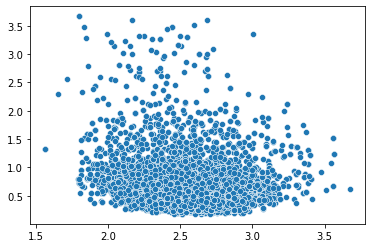

In [12]:
sns.scatterplot(x = x3c[:,0], y=x3c[:,1])

<AxesSubplot:ylabel='Count'>

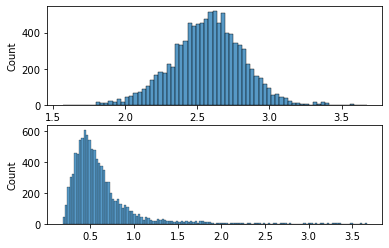

In [13]:
fig, ax = plt.subplots(2,1)
g = sns.histplot(x3c[:,0], ax=ax[0])
sns.histplot(x3c[:,1], ax=ax[1])
# g.set(xlim=(0,4))

In [9]:
true_par, np.mean(obs)

((2.35759407089737, 0.5712394274331519), 2.641308398052893)

The method seems to be overshooting the mean while undershooting the variance the true value quite a bit with only 10 observations. We se the mean of the 10 observations is also way above the true parameter

In [14]:
np.random.seed(seed = 184012)
obs_100, true_par = gen_observations(100)
np.random.seed(seed = 184012)
obs_1000, true_par = gen_observations(1000)

x3c_100 = mcmc_continuous(np.log([np.mean(obs), np.var(obs)]), obs, g3, norm_step, size=10_000, burn_in=1000)
x3c_1000 = mcmc_continuous(np.log([np.mean(obs), np.var(obs)]), obs, g3, norm_step, size=10_000, burn_in=1000)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [15]:
x3c_100 = np.stack(x3c_100)
x3c_1000 = np.stack(x3c_1000)

Text(0.5, 1.0, '1000 obs')

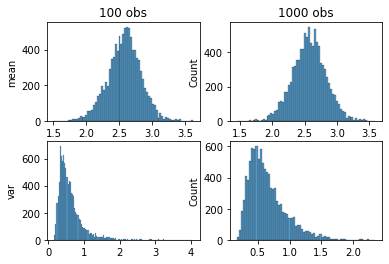

In [16]:
fig, ax = plt.subplots(2,2)
g = sns.histplot(x3c_100[:,0], ax=ax[0,0])
sns.histplot(x3c_100[:,1], ax=ax[1,0])
g = sns.histplot(x3c_1000[:,0], ax=ax[0,1])
sns.histplot(x3c_1000[:,1], ax=ax[1,1])

ax[0,0].set_title('100 obs')
ax[0,0].set_ylabel('mean')
ax[1,0].set_ylabel('var')
ax[0,1].set_title('1000 obs')

In [27]:
true_par

(2.35759407089737, 0.5712394274331519)